# Predicting toxicity

## Importing files and making dataframes

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,f_regression,VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score
import numpy as np

In [2]:
from google.colab import files
files.upload()

Saving tox_descriptors.csv to tox_descriptors.csv


{'tox_descriptors.csv': b'"Smiles","Name","Toxicity","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_VSA7","smr_VSA8","smr_VSA9","smr_VSA10","peoe_VSA1","peoe_VSA2","peoe_VSA3","peoe_VSA4","peoe_VSA5","peoe_VSA6","peoe_VSA7","peoe_

In [3]:
df_tox=pd.read_csv('tox_descriptors.csv')
df_tox

Smiles          Name  \
0     CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...       DB00014   
1     N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H]1C...       DB00035   
2     CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...       DB00050   
3     C/C=C/C[C@@H](C)[C@H](O)[C@@H]1/C(O)=N/[C@@H](...       DB00091   
4     NCCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H]1CSSC[C...       DB00093   
...                                                 ...           ...   
8942                                     C[C@@H](N)NCCO  ZINC98359253   
8943                      O=P(O)(O)OC(c1ccccc1)c1ccccc1  ZINC98359257   
8944                         CCCCO[C@@H](C)OC[C@@H](C)O  ZINC98359263   
8945                               C=C(CCN(CC)CC)C(=O)O  ZINC98359322   
8946                                     C1=CN=NN=NN=C1  ZINC98359352   

      Toxicity    SlogP       SMR   LabuteASA    TPSA       AMW      ExactMW  \
0            0 -3.10570  328.5382  523.803473  495.89  1269.433  1268.641439   
1            0 -4.13203  271.4037  433.305671  435.41  1069.238  1068.426955   
2            0 -0.50613  377.7252  594.534018  495.67  1431.064  1429.669818   
3            0  6.63020  336.1290  508.307235  292.76  1202.635  1201.841368   
4            0 -4.03470  266.8519  423.616115  405.32  1040.240  1039.436792   
...        ...      ...       ...         ...     ...       ...          ...   
8942         1 -1.12700   28.7379   43.518064   58.28   104.153   104.094963   
8943         1  2.88530   67.8561  105.105063   66.76   264.217   264.055146   
8944         1  1.54650   47.9548   74.680112   38.69   176.256   176.141244   
8945         1  1.35910   49.1808   73.684774   40.54   171.240   171.125929   
8946         1  1.31890   27.3440   45.502851   61.80   109.092   109.038845   

      NumLipinskiHBA  ...  MQN33  MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  \
0                 32  ...      0      0      4      2      0      0      0   
1                 26  ...      0      0      1      2      0      0      0   
2                 31  ...      0      0      1      5      0      0      0   
3                 23  ...      0      0      0      0      0      0      0   
4                 24  ...      0      0      1      2      0      0      0   
...              ...  ...    ...    ...    ...    ...    ...    ...    ...   
8942               3  ...      0      0      0      0      0      0      0   
8943               4  ...      0      0      0      2      0      0      0   
8944               3  ...      0      0      0      0      0      0      0   
8945               3  ...      0      0      0      0      0      0      0   
8946               5  ...      0      0      0      0      0      1      0   

      MQN40  MQN41  MQN42  
0         0      2      1  
1         1      0      0  
2         0      2      1  
3         1      0      0  
4         1      0      0  
...     ...    ...    ...  
8942      0      0      0  
8943      0      0      0  
8944      0      0      0  
8945      0      0      0  
8946      0      0      0  

[8947 rows x 122 columns]

## Scaling the descriptors

In [4]:
df_unscaled=df_tox.drop(['Smiles','Name'],axis='columns')
df_unscaled

Toxicity    SlogP       SMR   LabuteASA    TPSA       AMW      ExactMW  \
0            0 -3.10570  328.5382  523.803473  495.89  1269.433  1268.641439   
1            0 -4.13203  271.4037  433.305671  435.41  1069.238  1068.426955   
2            0 -0.50613  377.7252  594.534018  495.67  1431.064  1429.669818   
3            0  6.63020  336.1290  508.307235  292.76  1202.635  1201.841368   
4            0 -4.03470  266.8519  423.616115  405.32  1040.240  1039.436792   
...        ...      ...       ...         ...     ...       ...          ...   
8942         1 -1.12700   28.7379   43.518064   58.28   104.153   104.094963   
8943         1  2.88530   67.8561  105.105063   66.76   264.217   264.055146   
8944         1  1.54650   47.9548   74.680112   38.69   176.256   176.141244   
8945         1  1.35910   49.1808   73.684774   40.54   171.240   171.125929   
8946         1  1.31890   27.3440   45.502851   61.80   109.092   109.038845   

      NumLipinskiHBA  NumLipinskiHBD  NumRotatableBonds  ...  MQN33  MQN34  \
0                 32              20                 31  ...      0      0   
1                 26              18                 19  ...      0      0   
2                 31              20                 38  ...      0      0   
3                 23               5                 15  ...      0      0   
4                 24              17                 19  ...      0      0   
...              ...             ...                ...  ...    ...    ...   
8942               3               4                  3  ...      0      0   
8943               4               2                  4  ...      0      0   
8944               3               1                  7  ...      0      0   
8945               3               1                  6  ...      0      0   
8946               5               0                  0  ...      0      0   

      MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  
0         4      2      0      0      0      0      2      1  
1         1      2      0      0      0      1      0      0  
2         1      5      0      0      0      0      2      1  
3         0      0      0      0      0      1      0      0  
4         1      2      0      0      0      1      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
8942      0      0      0      0      0      0      0      0  
8943      0      2      0      0      0      0      0      0  
8944      0      0      0      0      0      0      0      0  
8945      0      0      0      0      0      0      0      0  
8946      0      0      0      1      0      0      0      0  

[8947 rows x 120 columns]

In [5]:
## Scaling the descriptors
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_unscaled.drop('Toxicity',axis='columns'))
df_scaled=pd.DataFrame(df_scaled)
df_scaled

0         1         2         3         4         5         6    \
0    -2.512188  6.373712  6.608674  8.024619  6.551154  6.554434  7.972700   
1    -2.982463  4.904444  5.105266  6.888987  5.188150  5.190064  6.212683   
2    -1.321039  7.638603  7.783695  8.020488  7.651600  7.651769  7.679364   
3     1.948898  6.568917  6.351240  4.210451  6.096368  6.099222  5.332674   
4    -2.937865  4.787390  4.944297  6.323988  4.990720  4.992509  5.626010   
...        ...       ...       ...       ...       ...       ...       ...   
8942 -1.605528 -1.335940 -1.370138 -0.192375 -1.382519 -1.381419 -0.534051   
8943  0.232948 -0.329978 -0.347015 -0.033146 -0.292742 -0.291363 -0.240715   
8944 -0.380504 -0.841759 -0.852454 -0.560216 -0.891614 -0.890457 -0.534051   
8945 -0.466372 -0.810231 -0.868990 -0.525479 -0.925765 -0.924634 -0.534051   
8946 -0.484792 -1.371786 -1.337166 -0.126280 -1.348892 -1.347729  0.052622   

           7         8         9    ...       109       110       111  \
0     8.473057  6.940845  8.343693  ... -0.169929 -0.152021  4.913833   
1     7.541635  3.817469  6.719244  ... -0.169929 -0.152021  0.721855   
2     8.473057  8.762815  8.343693  ... -0.169929 -0.152021  0.721855   
3     1.487392  2.776344  1.845896  ... -0.169929 -0.152021 -0.675470   
4     7.075924  3.817469  5.636278  ... -0.169929 -0.152021  0.721855   
...        ...       ...       ...  ...       ...       ...       ...   
8942  1.021681 -0.347032  0.762930  ... -0.169929 -0.152021 -0.675470   
8943  0.090259 -0.086751  0.221447  ... -0.169929 -0.152021 -0.675470   
8944 -0.375453  0.694093 -0.320036  ... -0.169929 -0.152021 -0.675470   
8945 -0.375453  0.433812 -0.320036  ... -0.169929 -0.152021 -0.675470   
8946 -0.841164 -1.127876 -0.861519  ... -0.169929 -0.152021 -0.675470   

           112       113        114       115       116       117       118  
0     0.256170 -0.203106  -0.058965 -0.029916 -0.097927  0.222906  0.087576  
1     0.256170 -0.203106  -0.058965 -0.029916  5.986452 -0.574991 -0.446537  
2     2.590133 -0.203106  -0.058965 -0.029916 -0.097927  0.222906  0.087576  
3    -1.299805 -0.203106  -0.058965 -0.029916  5.986452 -0.574991 -0.446537  
4     0.256170 -0.203106  -0.058965 -0.029916  5.986452 -0.574991 -0.446537  
...        ...       ...        ...       ...       ...       ...       ...  
8942 -1.299805 -0.203106  -0.058965 -0.029916 -0.097927 -0.574991 -0.446537  
8943  0.256170 -0.203106  -0.058965 -0.029916 -0.097927 -0.574991 -0.446537  
8944 -1.299805 -0.203106  -0.058965 -0.029916 -0.097927 -0.574991 -0.446537  
8945 -1.299805 -0.203106  -0.058965 -0.029916 -0.097927 -0.574991 -0.446537  
8946 -1.299805 -0.203106  16.959154 -0.029916 -0.097927 -0.574991 -0.446537  

[8947 rows x 119 columns]

## Splitting into training and test datasets

In [6]:
y=df_unscaled['Toxicity']
y.value_counts()

0    4893
1    4054
Name: Toxicity, dtype: int64

In [7]:
X_scaled=df_scaled.dropna(axis='columns')
X_unscaled=df_unscaled.drop('Toxicity',axis='columns')

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled, y, test_size=0.2,shuffle=True)
## Feature Selection using F_regression scores

# configure to select a subset of features
fs = SelectKBest(score_func=f_regression, k=60)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3934
1    3223
Name: Toxicity, dtype: int64
0    959
1    831
Name: Toxicity, dtype: int64


#Building Machine Learning Models
 ## 1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1,class_weight='balanced')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6641025641025641
0.7072625698324022


## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=14,n_estimators=400,min_samples_leaf=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6275911365260901
0.7089385474860335


## 3) K-neighbours classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6382085374387683
0.711173184357542


## 4) SVM classifier

In [ ]:
from sklearn.svm import SVC
model=SVC(C=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6573816155988859
0.7251396648044692


## 5) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.6221928665785997
0.6804469273743017


## 6) SGD classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(alpha=0.001,shuffle=False)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.5908761766835626
0.6843575418994413


## 7) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=4,min_samples_leaf=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.5668789808917197
0.6960893854748603


## Comparing Accuracy scores across models

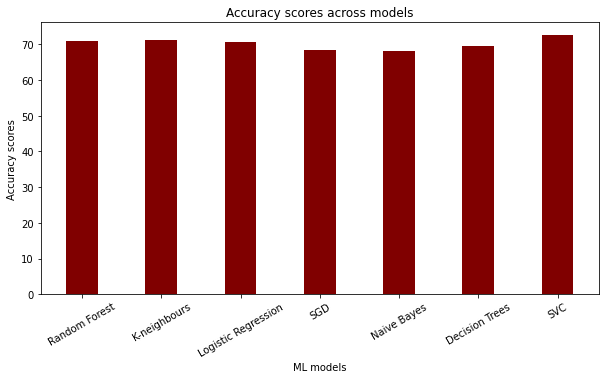

In [ ]:
# creating the dataset
data = {'Random Forest':70.89, 'K-neighbours':71.12, 'Logistic Regression':70.73,
        'SGD':68.44,'Naive Bayes':68.05,'Decision Trees':69.61,'SVC':72.51}
Classifiers = list(data.keys())
R2_scores = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Classifiers, R2_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("ML models")
plt.ylabel("Accuracy scores")
plt.title("Accuracy scores across models")
plt.xticks(rotation=30)
plt.show()

The best model is of Support Vector Machine with **72.51 %** accuracy.

## Predicting toxicity of our compounds with SVC classifier

In [ ]:
from google.colab import files
files.upload()


Saving desciptors.csv to desciptors.csv


{'desciptors.csv': b'"Molecule ChEMBL ID","Molecule Name","Molecule Max Phase","Molecular Weight","#RO5 Violations","AlogP","Smiles","Standard Type","Standard Value","Standard Units","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_

In [ ]:
df=pd.read_csv('desciptors.csv')
df1=df.drop(['Molecule ChEMBL ID','Molecule Name','Molecule Max Phase','Molecular Weight','#RO5 Violations','Smiles','Standard Type','Standard Value','Standard Units','AlogP','log_Standard Value'],axis='columns')
df1

SlogP       SMR   LabuteASA    TPSA      AMW     ExactMW  \
0     0.92720  132.1150  202.305969  161.30  476.545  476.239670   
1     2.93950  143.9170  228.312811  148.41  557.581  557.247456   
2     3.31940  118.4950  187.400905  123.05  457.460  457.183793   
3     2.43970  113.4510  172.704892  123.05  407.453  407.186987   
4     3.37440  127.2050  204.463982  145.17  502.501  502.205257   
...       ...       ...         ...     ...      ...         ...   
1001  0.40932   84.4731  128.248335   77.99  301.350  301.153875   
1002  1.08660   81.7434  140.308624   75.19  356.304  356.109625   
1003  4.59032  146.8939  216.956249   86.28  493.615  493.259009   
1004  1.11970   84.7381  140.744941   77.99  355.320  355.125609   
1005  2.14560  138.9384  227.019708  202.72  550.520  550.158745   

      NumLipinskiHBA  NumLipinskiHBD  NumRotatableBonds  NumHBD  ...  MQN33  \
0                 12               5                  5       3  ...      0   
1                 11               5                  6       3  ...      0   
2                  8               5                  4       3  ...      0   
3                  8               5                  4       3  ...      0   
4                 10               5                  6       3  ...      0   
...              ...             ...                ...     ...  ...    ...   
1001               7               3                  2       3  ...      0   
1002               7               2                  2       2  ...      0   
1003               8               2                  7       2  ...      0   
1004               7               3                  2       3  ...      0   
1005              12               7                  7       7  ...      0   

      MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  MQN41  MQN42  
0         0      0      5      0      0      0      0      0      0  
1         1      0      4      0      0      0      0      0      0  
2         0      0      4      0      0      0      0      0      0  
3         0      0      4      0      0      0      0      0      0  
4         0      0      4      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
1001      1      0      3      0      0      0      0      4      2  
1002      1      0      3      0      0      0      0      4      2  
1003      0      0      5      0      0      0      0      0      0  
1004      1      0      3      0      0      0      0      4      2  
1005      0      0      3      1      0      0      0      0      0  

[1006 rows x 119 columns]

In [ ]:
## Scaling the descriptors
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled

0         1         2         3         4         5         6    \
0    -1.701411  0.419601  0.313207  0.822052  0.225265  0.226241  1.293495   
1    -0.204112  0.910472  0.956493  0.580337  1.009458  1.010337  0.945937   
2     0.078562 -0.146885 -0.055474  0.104784  0.040578  0.041794 -0.096736   
3    -0.576000 -0.356676 -0.418984  0.104784 -0.443345 -0.442139 -0.096736   
4     0.119486  0.215383  0.366586  0.519580  0.476444  0.477569  0.598380   
...        ...       ...       ...       ...       ...       ...       ...   
1001 -2.086752 -1.561932 -1.518629 -0.740186 -1.470114 -1.468462 -0.444293   
1002 -1.582806 -1.675466 -1.220314 -0.792692 -0.938319 -0.936531 -0.444293   
1003  1.024219  1.034288  0.675585 -0.584731  0.390453  0.390975 -0.096736   
1004 -1.558177 -1.550910 -1.209522 -0.740186 -0.947841 -0.946055 -0.444293   
1005 -0.794832  0.703401  0.924508  1.598764  0.941128  0.941723  1.293495   

           7         8         9    ...       109       110       111  \
0     0.681636 -0.052355 -0.059456  ... -0.100201 -0.189244 -1.073242   
1     0.681636  0.346656 -0.059456  ... -0.100201  4.570250 -1.073242   
2     0.681636 -0.451367 -0.059456  ... -0.100201 -0.189244 -1.073242   
3     0.681636 -0.451367 -0.059456  ... -0.100201 -0.189244 -1.073242   
4     0.681636  0.346656 -0.059456  ... -0.100201 -0.189244 -1.073242   
...        ...       ...       ...  ...       ...       ...       ...   
1001 -0.222419 -1.249391 -0.059456  ... -0.100201  4.570250 -1.073242   
1002 -0.674447 -1.249391 -0.534164  ... -0.100201  4.570250 -1.073242   
1003 -0.674447  0.745668 -0.534164  ... -0.100201 -0.189244 -1.073242   
1004 -0.222419 -1.249391 -0.059456  ... -0.100201  4.570250 -1.073242   
1005  1.585691  0.745668  1.839374  ... -0.100201 -0.189244 -1.073242   

           112       113       114  115       116       117       118  
0     1.962917 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
1     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
2     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
3     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
4     0.852290 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
...        ...       ...       ...  ...       ...       ...       ...  
1001 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1002 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1003  1.962917 -0.284674 -0.031544  0.0 -0.169204 -0.761348 -0.693991  
1004 -0.258337 -0.284674 -0.031544  0.0 -0.169204  0.358003  0.252019  
1005 -0.258337  3.250901 -0.031544  0.0 -0.169204 -0.761348 -0.693991  

[1006 rows x 119 columns]

### Predicting toxicity

In [ ]:
from sklearn.svm import SVC
model=SVC(C=3)
model.fit(X_train,y_train)
y_pred=model.predict(df1_scaled)


In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[  0 598]
 [  1 408]]


In [ ]:
from google.colab import files
y_pred=pd.DataFrame(y_pred)
y_pred.to_csv('tox1_toggle.csv',index=False)
files.download('tox1_toggle.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Here, 0-> safe 
<br>1-> Toxic

## Predicting toxicity for our generated molecules

In [12]:
from google.colab import files
files.upload()

Saving gen_mols_descriptors.csv to gen_mols_descriptors.csv


{'gen_mols_descriptors.csv': b'"Smiles","SlogP","SMR","LabuteASA","TPSA","AMW","ExactMW","NumLipinskiHBA","NumLipinskiHBD","NumRotatableBonds","NumHBD","NumHBA","NumAmideBonds","NumHeteroAtoms","NumHeavyAtoms","NumAtoms","NumStereocenters","NumUnspecifiedStereocenters","NumRings","NumAromaticRings","NumSaturatedRings","NumAliphaticRings","NumAromaticHeterocycles","NumSaturatedHeterocycles","NumAliphaticHeterocycles","NumAromaticCarbocycles","NumSaturatedCarbocycles","NumAliphaticCarbocycles","FractionCSP3","Chi0v","Chi1v","Chi2v","Chi3v","Chi4v","Chi1n","Chi2n","Chi3n","Chi4n","HallKierAlpha","kappa1","kappa2","kappa3","slogp_VSA1","slogp_VSA2","slogp_VSA3","slogp_VSA4","slogp_VSA5","slogp_VSA6","slogp_VSA7","slogp_VSA8","slogp_VSA9","slogp_VSA10","slogp_VSA11","slogp_VSA12","smr_VSA1","smr_VSA2","smr_VSA3","smr_VSA4","smr_VSA5","smr_VSA6","smr_VSA7","smr_VSA8","smr_VSA9","smr_VSA10","peoe_VSA1","peoe_VSA2","peoe_VSA3","peoe_VSA4","peoe_VSA5","peoe_VSA6","peoe_VSA7","peoe_VSA8","peoe_V

In [14]:
df=pd.read_csv('gen_mols_descriptors.csv')
df1=df.drop('Smiles',axis='columns')
## Scaling the descriptors
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled

0         1         2         3         4         5         6    \
0   0.025801  1.126417  1.168095  1.067493  1.329513  1.328679  1.453444   
1   0.556486  1.801901  1.537147  0.292054  1.325886  1.329507  0.782624   
2   1.729364  0.880436  0.840714 -0.565349  0.823879  0.819230 -0.223607   
3  -1.977062  0.703563  0.879595  2.378928  0.975946  0.979871  1.788854   
4   0.513879  0.065302  0.159999 -0.565349  0.197397  0.192744 -0.223607   
5  -1.153049 -1.077015 -1.159208 -0.344308 -1.285428 -1.281997 -0.559017   
6  -0.683640  0.108859  0.230399  1.025674  0.100148  0.103779  0.782624   
7  -0.800958 -1.615581 -1.662473 -0.715658 -1.777431 -1.774063 -0.894427   
8  -0.126515 -0.352316 -0.171665 -0.128284 -0.003174 -0.004034  0.111803   
9   0.862078 -0.146691 -0.212394 -0.301055 -0.334017 -0.334726 -0.559017   
10 -0.095065 -1.510662 -1.590921 -1.512603 -1.367768 -1.372864 -1.900658   
11  1.148682  0.015787 -0.019288 -0.631542  0.015048  0.013874 -0.559017   

         7         8         9    ...  109  110       111       112  113  114  \
0  -0.162938  1.312785 -0.053683  ...  0.0  0.0 -0.282843 -0.242536  0.0  0.0   
1  -0.162938  1.021055 -0.053683  ...  0.0  0.0 -1.131371  1.940285  0.0  0.0   
2  -0.814688  2.187975 -0.697877  ...  0.0  0.0 -1.131371  0.485071  0.0  0.0   
3   3.095815 -0.729325  3.167286  ...  0.0  0.0  1.414214  0.485071  0.0  0.0   
4  -0.814688  0.145865 -0.697877  ...  0.0  0.0 -0.282843  0.485071  0.0  0.0   
5   0.488813 -0.729325 -0.053683  ...  0.0  0.0  0.565685 -0.970143  0.0  0.0   
6  -0.162938 -0.729325 -0.697877  ...  0.0  0.0 -0.282843  1.212678  0.0  0.0   
7  -0.162938 -1.021055 -0.053683  ...  0.0  0.0 -0.282843 -0.970143  0.0  0.0   
8  -0.162938 -0.145865 -0.053683  ...  0.0  0.0  2.262742 -1.697749  0.0  0.0   
9  -0.162938 -0.145865 -0.053683  ...  0.0  0.0 -1.131371  0.485071  0.0  0.0   
10 -0.814688 -1.312785 -0.697877  ...  0.0  0.0 -0.282843 -0.970143  0.0  0.0   
11 -0.162938  0.145865 -0.053683  ...  0.0  0.0  0.565685 -0.242536  0.0  0.0   

    115  116       117       118  
0   0.0  0.0 -1.073030 -1.073030  
1   0.0  0.0 -0.315597 -0.315597  
2   0.0  0.0 -0.315597 -0.315597  
3   0.0  0.0  2.714136  2.714136  
4   0.0  0.0  0.441836  0.441836  
5   0.0  0.0 -0.315597 -0.315597  
6   0.0  0.0  1.199269  1.199269  
7   0.0  0.0 -0.315597 -0.315597  
8   0.0  0.0 -0.315597 -0.315597  
9   0.0  0.0 -1.073030 -1.073030  
10  0.0  0.0 -0.315597 -0.315597  
11  0.0  0.0 -0.315597 -0.315597  

[12 rows x 119 columns]

In [15]:
from sklearn.svm import SVC
model=SVC(C=3)
model.fit(X_train,y_train)
y_pred=model.predict(df1_scaled)

In [16]:
unique, counts = np.unique(y_pred, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result)

[[0 8]
 [1 4]]


In [17]:
y_pred=pd.DataFrame(y_pred)
df['Activity']=y_pred
df

Smiles    SlogP       SMR  \
0   COc1cc(N2CCN(CC(=O)N(C)C)C2=O)ccc1Nc1ncc(Cl)c(...  4.13810  158.3742   
1   C=CC(=O)Nc1cccc(-n2c(=O)c(Cc3ccccc3)cc3cnc(Nc4...  5.00000  179.1964   
2   C=CCCCCCCN1CCOC(COc2cc3ncnc(Nc4ccc(Cl)c(Cl)c4)...  6.90490  150.7917   
3   CN(C)N1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O...  0.88520  145.3395   
4   COc1cc2c(Nc3ccc(Cl)c(Cl)c3)ncnc2cc1OC[C@@H]1CN...  4.93080  125.6647   
5              COc1cccc(-c2cn(C3CCNC3)c3ncnc(N)c23)c1  2.22350   90.4521   
6   COc1ccc2c(c1)cc(C1C(C#N)=C(N)N(c3cccnc3)C3=C1C...  2.98588  127.0074   
7                       Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O  2.79534   73.8505   
8   Cc1cn2c(-c3cn[nH]c3)cnc2c(Nc2cc(CN3CCC(F)(F)C3...  3.89072  112.7914   
9   Cc1ccc(NC(=O)c2ccc(Cl)cc2)cc1Nc1nccc(-c2cccnc2)n1  5.49632  119.1299   
10                    O=C1Nc2ccccc2/C1=C/c1ccc(Br)cc1  3.94180   77.0847   
11   Fc1ccc(Nc2ncnc3nc(Nc4ccc(CN5CCCC5)cc4)sc23)cc1Cl  5.96180  124.1384   

     LabuteASA    TPSA      AMW     ExactMW  NumLipinskiHBA  NumLipinskiHBD  \
0   243.737899  137.07  602.117  601.187416              12               2   
1   261.163234  104.62  601.711  601.280138              10               2   
2   228.280077   68.74  545.511  544.200796               7               1   
3   230.115908  191.95  562.535  562.169978              13               7   
4   196.139139   68.74  475.376  474.122546               7               1   
5   133.850767   77.99  309.373  309.158960               6               3   
6   199.463141  135.32  464.489  464.170922              10               2   
7   110.088387   62.45  254.293  254.116761               5               2   
8   180.479093   87.03  452.922  452.110998               8               2   
9   178.556027   79.80  415.884  415.119988               6               2   
10  113.466821   29.10  300.155  298.994576               2               1   
11  187.673802   65.97  454.962  454.114272               6               2   

    NumRotatableBonds  ...  MQN34  MQN35  MQN36  MQN37  MQN38  MQN39  MQN40  \
0                  10  ...      0      1      3      0      0      0      0   
1                   9  ...      0      0      6      0      0      0      0   
2                  13  ...      0      0      4      0      0      0      0   
3                   3  ...      0      3      4      0      0      0      0   
4                   6  ...      0      1      4      0      0      0      0   
5                   3  ...      0      2      2      0      0      0      0   
6                   3  ...      0      1      5      0      0      0      0   
7                   2  ...      0      1      2      0      0      0      0   
8                   5  ...      0      4      1      0      0      0      0   
9                   5  ...      0      0      4      0      0      0      0   
10                  1  ...      0      1      2      0      0      0      0   
11                  6  ...      0      2      3      0      0      0      0   

    MQN41  MQN42  Activity  
0       0      0         0  
1       2      1         0  
2       2      1         0  
3      10      5         1  
4       4      2         0  
5       2      1         1  
6       6      3         0  
7       2      1         1  
8       2      1         0  
9       0      0         0  
10      2      1         1  
11      2      1         0  

[12 rows x 121 columns]